# Introductory applied machine learning
# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from utils.plotter import scatter_jitter, plot_confusion_matrix
# Your Code goes here:

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:
path = os.path.join(os.getcwd(),"datasets","train_auto_numeric.csv")
auto_numeric = pd.read_csv(path,delimiter=',')
display (auto_numeric.describe())
display (auto_numeric.shape)
auto_numeric.head()


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(159, 16)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


(2) ***Your answer goes here:***
The dataset is consist of 159 data sample each with 16 features.all 16 features are numerics.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

In [3]:
# (1) # Your Code goes here:
#A.
correlation_matrix = np.corrcoef(auto_numeric,rowvar=False)
display(auto_numeric.columns)
display(correlation_matrix[:,-1])

Index([u'normalized-losses', u'wheel-base', u'length', u'width', u'height',
       u'engine-size', u'bore', u'stroke', u'compression-ratio',
       u'engine-power', u'peak-rpm', u'city-mpg', u'highway-mpg',
       u'mean-effective-pressure', u'torque', u'price'],
      dtype='object')

array([ 0.01536765,  0.4235106 ,  0.51288305,  0.52432555,  0.13956256,
        0.71512459,  0.36520729,  0.12783403,  0.12568322,  0.44396859,
       -0.09934529, -0.3567895 , -0.43846743, -0.10486005,  0.10143458,
        1.        ])

[]

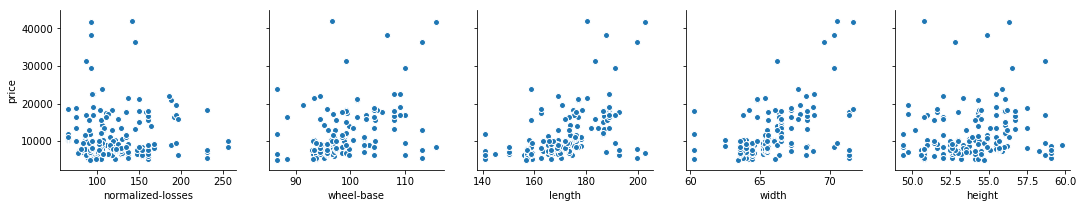

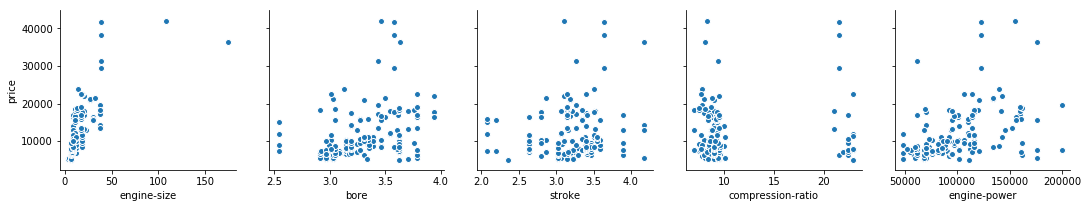

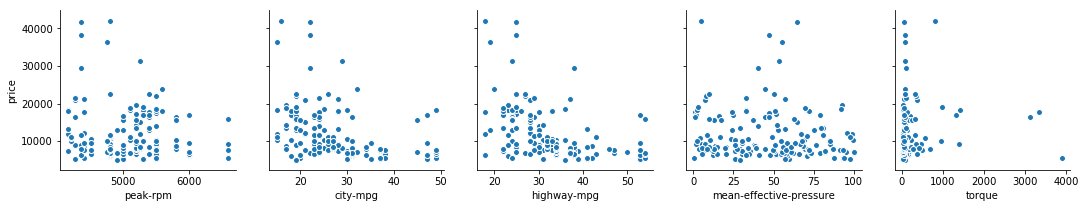

In [4]:
#B.
sns.pairplot(data = auto_numeric,x_vars=auto_numeric.columns[0:5],size=3,y_vars='price')
sns.pairplot(data = auto_numeric,x_vars=auto_numeric.columns[5:10],size=3,y_vars='price')
sns.pairplot(data = auto_numeric,x_vars=auto_numeric.columns[10:15],size=3,y_vars='price')
plt.plot()

(2) ***Your answer goes here:***
the five most important features are 'wheel-base' 'length' 'width' 'engine-size' 'engine-power'. They are selected based on the absolute value of the corresponding correlation coeficient, which is more useful as a high absolute value implies high correlation. 

/usr/lib64/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


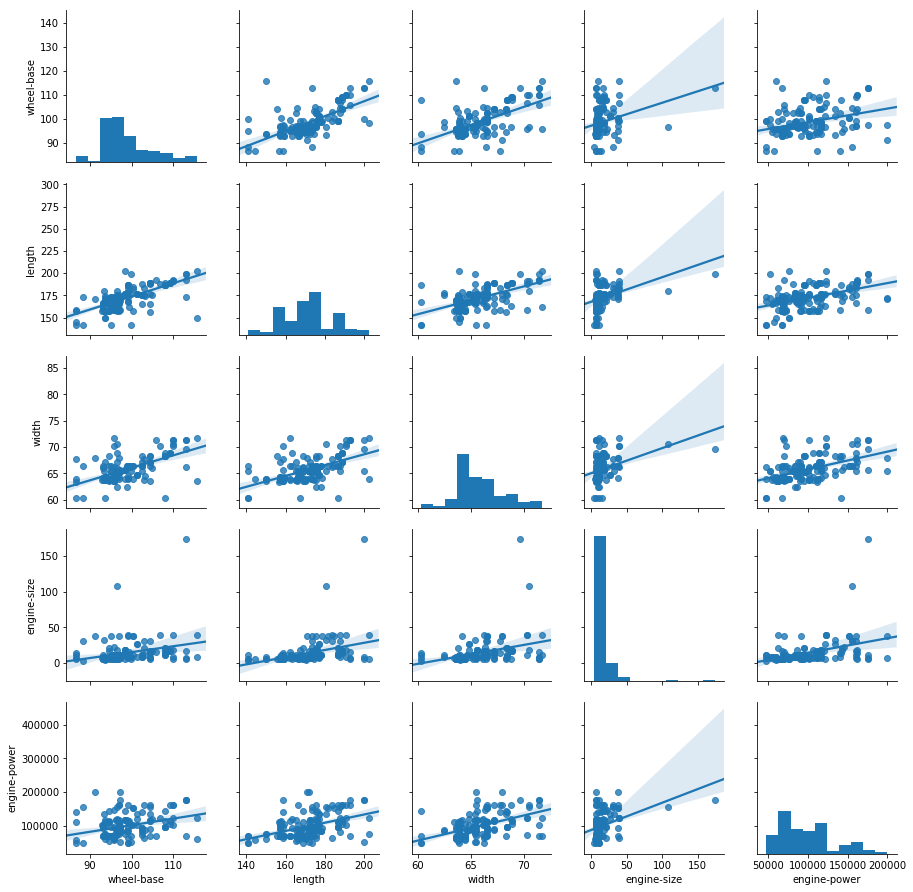

In [5]:
# (3) # Your Code goes here:
feature_list = ['wheel-base','length','width','engine-size','engine-power']
sns.pairplot(data = auto_numeric,vars=feature_list,kind='reg')
plt.show()

(4) ***Your answer goes here:***

As shown in the graph above, the following features are positvely correlated to each other:

wheel-base, width, length,engine-power 


(5) ***Your answer goes here:***

I would remove the 'normalized-losses' feature. it has a pearson correlation coefecient of 0.01536765, which is significantly lower than any other feature. so hopefully removing it won't affect the classification accuracy
Also I would consider remove 'compression ratio', which has a low pearson correlation coefecient of 0.12568322. the pairplot  of this feature with price shows that the ratio is centered around two extreme. This sort of distribution do not have a normal distribution of residual, and linear regression doesn't fit well on those type of distribution.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

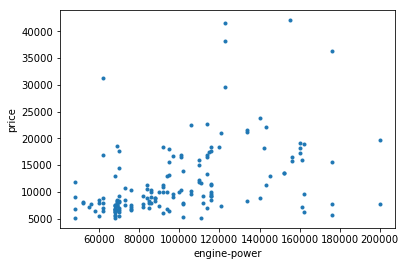

In [6]:
# (1) # Your Code goes here:
plt.xlabel("engine-power")
plt.ylabel("price")
plt.scatter(auto_numeric["engine-power"],auto_numeric["price"],marker='.')
plt.show()

(2) ***Your answer goes here:***
it is not very informative. the most we can probably say is that if the engine power is low(<100000) than price is  very unlikely to be greater than 20000

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

/usr/lib64/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


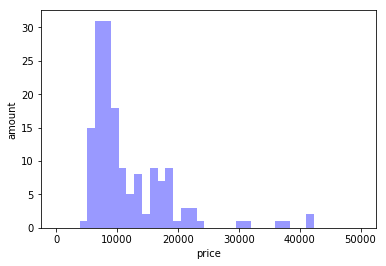

In [7]:
# (1) # Your Code goes here:
bins = np.linspace(0, 50000, 40)
sns.distplot(auto_numeric['price'],bins=bins, kde=False, color="b",label="price")
plt.ylabel ('amount')
plt.show()

(2) ***Your answer goes here:***
The linear regression model is prone to be affected by outliers. There are a total of five sample with a price higher than 25000. If those high prices are outliers, since the number of outliers is small, we may just discard it. But also we can't make the decision just yet, since those high prices of the cars still remain in a relatively reasonable range,(intuitively speaking, cars that are really high end can achieve such price) and it could be the case that those are real data that needs to be taken into consideration. We will need more data to decide if those outliers appear systematically. If that's the case, then we might take logarithm of the skewed data and the normalize.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [8]:
# Your Code goes here:
ep = auto_numeric["engine-power"]
ep = ep[:,np.newaxis]
# print(ep.shape,type(ep),ep)
X_train, X_test,y_train,y_test=train_test_split(ep,auto_numeric["price"],test_size=0.2,train_size=0.8,random_state=0)
print("shape of X_train: {}".format(X_train.shape))
print("shape of X_test: {}".format(X_test.shape))
print("shape of y_train: {}".format(y_train.shape))
print("shape of y_test: {}".format(y_test.shape))


shape of X_train: (127, 1)
shape of X_test: (32, 1)
shape of y_train: (127,)
shape of y_test: (32,)


### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [9]:
# Your Code goes here:
baseline = np.mean(y_train)
print("the baseline prediction of price is: {}".format(baseline))

the baseline prediction of price is: 11853.2677165


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [10]:
# (1) # Your Code goes here:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lrm= LinearRegression()
lrm.fit(X_train,y_train)

# print("r2 score on test set: {}".format(lrm.score(X_test,y_test)))
# print("RMSE on test set: {}".format(np.sqrt(mean_squared_error(y_test,lrm.predict(X_test)))))

print("weights of the linear regression are: slope: {:.4f},intercept: {:.3f}".format(lrm.coef_[0],lrm.intercept_))
#lrm.score(X_train,y_train)

weights of the linear regression are: slope: 0.0899,intercept: 2823.122


(2) ***Your answer goes here:***

the weight of engine-power to predict price is 0.08988389. The positive coefficient means that based on this model, the higher the engine power, the higher the price is expected to be.This positive weight confirms the knowledge that engine power and price are positively correlated.However since the data is not normalized,the actual value of the wight doesn't entail anything about how closely 'engine-power' is related to 'price' , as we can't compare it with another weight should we run linear regression on another feature. 

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

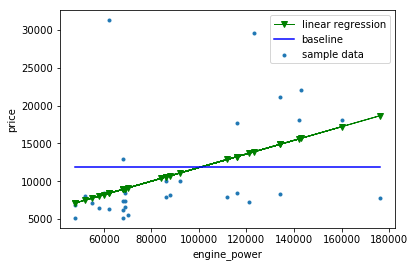

In [11]:
# (1) # Your Code goes here:
#print(X_test["engine-power"][:,np.newaxis])
#print(X_trans)
plt.scatter(X_test,y_test,marker='.')
y_predict = lrm.predict(X_test)
plt.plot(X_test, y_predict, 'gv-', linewidth=1)
plt.plot([X_test.min(),X_test.max()],[baseline,baseline],color='b')
plt.xlabel('engine_power')
plt.ylabel('price')
plt.legend(['linear regression','baseline','sample data'],loc='best')
plt.show()


(2) ***Your answer goes here:***
the linear regression seems to give a better approximation of the data, as  it encodes the positive corelation that as engine_power goes higher price also goes higher on average into its slope.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

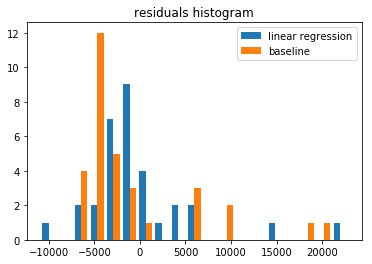

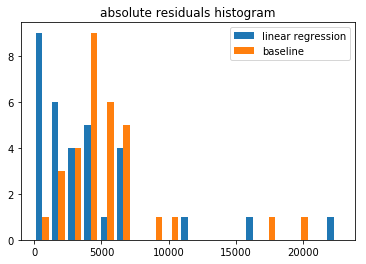

In [12]:
# (1) # Your Code goes here:
lr = y_test-y_predict
br =y_test-baseline

bins = np.linspace(np.minimum(lr.min(),br.min()),np.maximum(lr.max(),br.max()), 20)

#print(lr,br,bins)
plt.title("residuals histogram")
plt.hist([lr,br], bins, label=['linear regression', 'baseline'])
plt.legend(loc='upper right')
plt.show()
plt.figure()
lr = np.abs(y_test-y_predict)
br =  np.abs(y_test-baseline)
bins = np.linspace(0,np.maximum(lr.max(),br.max()), 20)
plt.title("absolute residuals histogram")
plt.hist([lr,br], bins, label=['linear regression', 'baseline'])
plt.legend(loc='upper right')
plt.show()
# print(y_test.shape[0])
# import matplotlib as mpl
# colour_palette = mpl.rcParams['axes.prop_cycle'].by_key()['color']
#  # the x locations for the groups
# width = 0.35        # the width of the bars
# fig, ax = plt.subplots(figsize=(12,6))
# print(type(ax))
# ham_rects = ax.bar(np.arange(y_test.shape[0]), np.abs(y_test-y_predict), width, color=colour_palette[0])
# spam_rects = ax.bar(np.arange(y_test.shape[0]) + width, np.abs(y_test-baseline), width, color=colour_palette[1])
# ax.set_ylabel('residuals')
# ax.set_xticks(ind + width)
# ax.legend((ham_rects[0], spam_rects[0]), ('Ham', 'Spam'), loc='best')
# plt.show()

In [13]:
# (2) # Your Code goes here:
lr_rmse = mean_squared_error(y_test,y_predict)
lr_rsquare = r2_score(y_test,y_predict)
print("Linear regression: RMSE: {:.3f} r2_score: {:.4f}".format(np.sqrt(lr_rmse),lr_rsquare) )
bl_predict = np.zeros(y_test.shape[0])
bl_predict = bl_predict + baseline
bl_rmse = mean_squared_error(y_test,bl_predict)
bl_rsquare = r2_score(y_test,bl_predict)
print("baseline prediction: RMSE: {:.3f} r2_score: {:.4f}".format(np.sqrt(bl_rmse), bl_rsquare))

Linear regression: RMSE: 6153.704 r2_score: 0.1685
baseline prediction: RMSE: 6800.331 r2_score: -0.0154


(3) ***Your answer goes here:***

the first graph is showing the residual and the second is showing the absolute residual between the true price(y_test) and the predicted price( linear regression and baseline ) as a histogram. the blue bars show the distribution of the residual of linear regression and the orange one shows the residual of the baseline. The question asks for residual but I think the absolute residual gives a better interpretation of how the model is fitting the data.

RMSE is measuring the root mean squared error, which is the square root of the mean of the summed squared error. R2_score,also called Coefficient of determination, is expressed as the ratio of the explained variance(VE) to the total variance(V). The explained variance is total Variance (V) minus the sum of the square of the residuals. Intuitively this is the part of the deviation from the mean that can be explained by the model. a smaller RMSE and a higher r2 score would mean that the model fits the data more accurately.

So in this case, linear regression outperforms the baseline predicter in terms of data fitting in every estimation. It has a higher R2 score and a lower RMSE, and from the plots (more obviously from the plot of absolute residual) the residuals of linear regression are closer to 0 in general and thus the predict is closer to the true y value. Also, the residual distribution for linear regression is more or less similar to a gaussian distribution and that also gives us confidence for using linear regression to fit the data

Also, an interesting result is that the r2_score of the baseline is actually lower than 0. this could result from taking a worse regression than the mean, namely the mean of the training examples are not the same as the testing examples.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***

the repurcussions includes:
1. a large porpotion of the data are not included in the training
2. the distribution of the features of the testing valiadation data might deviate from the distribution due to the relatively small valiadation set size   

In [14]:
# (2) # Your Code goes here:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=5,shuffle = True,random_state=0)
kf.split(auto_numeric['engine-power'])
splitcount=0
for train_index, test_index in kf.split(ep):
    splitcount=splitcount+1
    print("split {}:\nTRAIN: {}\nTEST:{}".format(splitcount,train_index, test_index))
#y_train, y_test = y[train_index], y[test_index]


split 1:
TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158]
TEST:[  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
split 2:
TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  9

In [15]:
# (3) # Your Code goes here:
y_pred_cv  = cross_val_predict(lrm,ep,auto_numeric['price'],cv=kf)
cv_rmse = mean_squared_error( auto_numeric['price'],y_pred_cv)
cv_r2   =r2_score( auto_numeric['price'],y_pred_cv)
print("Linear Regression with cross validation: RMSE: {:.3f} r2_score: {:.4f}".format(np.sqrt(cv_rmse), cv_r2))

Linear Regression with cross validation: RMSE: 6114.452 r2_score: 0.1730


(4) ***Your answer goes here:*** 
the RMSE is slightly lower than the RMSE value (6153.703) of the hold-out test samples, and the r2 score is slightly higher than the hold-out set (0.1685). the increasement is not significant, but still this is consistent with the intuition that the linear regression model with cross validation is favorable in comparision to the model with hold out valiadation in terms of performance. 

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [16]:
# (1) # Your Code goes here:

In [17]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [18]:
# (1) # Your Code goes here:
kf = KFold(n_splits=5,shuffle = True,random_state=0)
kf.split(auto_numeric)
y_pred_cv  = cross_val_predict(lrm,auto_numeric.drop("price",axis=1),auto_numeric['price'],cv=kf)
cv_rmse = mean_squared_error( auto_numeric['price'],y_pred_cv)
cv_r2   =r2_score( auto_numeric['price'],y_pred_cv)

print("Multivariate Linear Regression with Cross Valiadation: RMSE: {:.3f} r2_score: {:.4f}".format(np.sqrt(cv_rmse), cv_r2))

Multivariate Linear Regression with Cross Valiadation: RMSE: 4819.805 r2_score: 0.4861


(2) ***Your answer goes here:***

The result is vastly improved compared with the model trained in Q2.5 in terms of RMSE (6153.704) and r2 score (0.1685). This improvement is expected as we've taken more information from the data and also increased the parameters of the linear regression model. The change from hold out valiadation to cross valiadation also helps to improve the result by taking more data into training and thus averaging out the extreme values.


### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

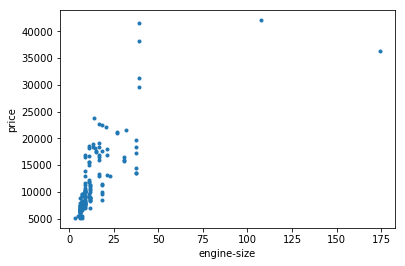

In [19]:
# (1) # Your Code goes here:
plt.scatter(auto_numeric['engine-size'],auto_numeric['price'],marker='.')
plt.xlabel("engine-size")
plt.ylabel("price")
plt.show()

(2) ***Your answer goes here:***

Datapoints are very dense over the bottom left corner and there are outliers over the upper right. This scewed distribution of the 'engine-size' feature would affect the linear regression seversely. As the model use summed squared error as the cost to minimise, the outliers will have a large impact on the predicted line.
Also the Coresponding residual plot, if visualised, is clear not random, which implies that linear regression on this pair of attributes might not be a good approximation. 

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

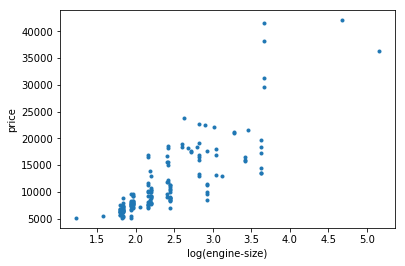

In [24]:
# (1) # Your Code goes here:
# transform by taking the log of the engine size 
log_size = np.log(auto_numeric["engine-size"])

plt.scatter(X_trans,auto_numeric['price'],marker='.')
plt.xlabel("log(engine-size)")
plt.ylabel("price")
plt.show()

In [26]:
# (2) # Your Code goes here:
X_trans = auto_numeric.drop(["price","engine-size"],axis=1)
X_trans["engine-size"] =log_size 
y_pred_tr  = cross_val_predict(lrm,X_trans,auto_numeric['price'],cv=kf)
tr_rmse = mean_squared_error( auto_numeric['price'],y_pred_tr)
tr_r2   =r2_score( auto_numeric['price'],y_pred_tr)
print("linear regression after tranforming engine size:  RMSE: {:.3f} r2_score: {:.4f}".format(np.sqrt(tr_rmse), tr_r2))


after tranform:  RMSE: 3745.920 r2_score: 0.6896


***Your answer goes here:***

The RMSE error has shrunk to 3745.920 from 4819.805 and the r2_score has changed from 0.4861 to 0.6896. This significant improvement took place because by taking logarithm we take the outliers back to normal range, and the dense data points at the bottom left corner of the plot of Q3.2 have been separated from each other horizontally.This also imples that the original distribution of the engine size follows an exponential distribution, which is transformed into a rather flat distribution after taking logrithm. So as a result the whole graph now is more suitable to be fitted into a linear regression model. 

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [22]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [23]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***